In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Visualization Imports

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np

In [8]:
dist = df['Outcome'].value_counts()
colors = ['blue', 'orange']
trace = go.Pie(values=(np.array(dist)), labels=dist.index)
layout = go.Layout(title='Diabetes Outcome')
data = [trace]
fig = go.Figure(trace, layout)
fig.update_traces(marker=dict(colors= colors, line=dict(color='#000000', width=2)))
fig.show()

In [9]:
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist() }

import plotly.graph_objects as go
dfNew = df.corr()
fig = go.Figure(data=go.Heatmap(df_to_plotly(dfNew)))
fig.show()

### Visualize Glucose Levels and Insulin

In [11]:
fig = px.scatter(df, x = 'Glucose', y = 'Insulin')
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',marker_line_width=1.5)
fig.update_layout(title_text='Glucose and Insulin')
fig.show()

### Visualize Outcome and Age

In [13]:
fig = px.box(df, x='Outcome', y='Age')
fig.update_traces(marker_color="midnightblue",marker_line_color='rgb(8,48,107)',marker_line_width=1.5)
fig.update_layout(title_text='Age and Outcome')
fig.show()

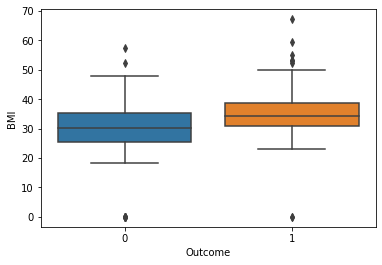

In [14]:
plot = sns.boxplot(x='Outcome',y="BMI",data=df)